In [1]:
using DifferentialEquations, Plots, Sundials

In [2]:
function powerflow!(du,u,p,t)
    θ_1,v_3,θ_3=u

    p_1=0.944
    p_l3=0
    q_l3=0

    y_11=6.66666667
    y_12=0.0
    y_13=6.66666667
    y_21=y_12
    y_22=5.05050505
    y_23=5.05050505
    y_31=y_13
    y_32=y_23
    y_33=11.71717172

    ϕ_11=-1.57079633
    ϕ_12=0.0
    ϕ_13= 1.57079633
    ϕ_21=ϕ_12
    ϕ_22=-1.57079633
    ϕ_23=1.57079633
    ϕ_31=ϕ_13
    ϕ_32=ϕ_23
    ϕ_33=-1.57079633

    v_1=1.03
    θ_2=0.0
    v_2=1.0
    
    
    du[1] = p_1 - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    du[2] = p_l3 - (v_3*v_1*y_31*cos(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*cos(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*cos(θ_3 - θ_3 -ϕ_33)) 
    du[3] = q_l3 - (v_3*v_1*y_31*sin(θ_3 - θ_1 -ϕ_31) + v_3*v_2*y_32*sin(θ_3 - θ_2 -ϕ_32) + v_3*v_3*y_33*sin(θ_3 - θ_3 -ϕ_33))
end

powerflow! (generic function with 1 method)

In [3]:
M0_pf = zeros(3,3)
t_span_pf=(0.0,5)
# θ_2,v_3,θ_3=u
u0_pf=[0,1.0,0];
pf = ODEFunction(powerflow!,mass_matrix=M0_pf)
pf0 = ODEProblem(pf,u0_pf,t_span_pf,());
sol_pf = solve(pf0,Rodas5(),abstol=1e-8,reltol=1e-8);
begin
    v_10=1.03
    θ_20=0.0
    v_20=1.0
end
θ_10,v_30,θ_30=sol_pf.u[end]


3-element Vector{Float64}:
 0.32461479155703327
 1.004014153353707
 0.18725718301004352

In [4]:
function fxinit!(du,u,p,t)
    δ,ω,e_q_prime,i_d,i_q=u
    θ_10,v_30,θ_30=p
    
    # e_q_prime=1.1087
    x_d_prime=0.24
    p_m=0.944
    # p_e=p_m
    H=3.5

    y_11=6.66666667
    y_12=0.0
    y_13=6.66666667
    y_21=y_12
    y_22=5.05050505
    y_23=5.05050505
    y_31=y_13
    y_32=y_23
    y_33=11.71717172

    ϕ_11=-1.57079633
    ϕ_12=0.0
    ϕ_13= 1.57079633
    ϕ_21=ϕ_12
    ϕ_22=-1.57079633
    ϕ_23=1.57079633
    ϕ_31=ϕ_13
    ϕ_32=ϕ_23
    ϕ_33=-1.57079633

    v_1=1.03
    θ_1=θ_10
    v_2=1.0
    θ_2=0.0
    v_3=v_30
    θ_3=θ_30
    Ω=2π*60
    d=1
    # q_e=0.28818

    du[1] = Ω*(ω-1)
    # du[2] = -v_1*sin(δ-θ_1) + x_d_prime*i_q
    du[2] = ((e_q_prime - v_1*cos(δ-θ_1))/x_d_prime) - i_d
    # du[3] = e_q_prime -v_1*cos(δ-θ_1) - x_d_prime*i_d
    du[3] = v_1*sin(δ-θ_1)/x_d_prime - i_q

    # du[4] = i_d*v_1*sin(δ-θ_1) + i_q*v_1*cos(δ-θ_1) - (v_1*v_1*y_11*cos(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*cos(θ_1 - θ_2 -ϕ_12) + v_1*v_3*y_13*cos(θ_1 - θ_3 -ϕ_13))
    du[4] = i_d*sin(δ) + i_q*cos(δ)  - (v_1*y_11*cos(θ_1  + ϕ_11) + v_2*y_12*cos(θ_2 + ϕ_12) + v_3*y_13*cos(θ_3 + ϕ_13))
    # du[5] = i_d*v_1*cos(δ-θ_1) - i_q*v_1*sin(δ-θ_1) - (v_1*v_1*y_11*sin(θ_1 - θ_1 -ϕ_11) + v_1*v_2*y_12*sin(θ_1 - θ_2 -ϕ_12)+ v_1*v_3*y_13*sin(θ_1 - θ_3 -ϕ_13))
    du[5] = i_q*sin(δ) - i_d*cos(δ) - (v_1*y_11*sin(θ_1  + ϕ_11) + v_2*y_12*sin(θ_2 + ϕ_12) + v_3*y_13*sin(θ_3 + ϕ_13))
end

fxinit! (generic function with 1 method)

In [16]:
M0 = zeros(5,5)
t_span0=(0.0,5)
u0=zeros(5);
f0 = ODEFunction(fxinit!,mass_matrix=M0)
# θ_10,v_30,θ_30=p
p0=[θ_10,v_30,θ_30]
prob0 = ODEProblem(f0,u0,t_span0,p0);
sol0 = solve(prob0);
sol0.u
# δ,ω,e_q_prime,i_d,i_q=u
δ0,ω0,e_q_prime0,i_d0,i_q0=sol0.u[end]

5-element Vector{Float64}:
 0.5243271428131491
 1.0
 1.1087455985400045
 0.41340918222502276
 0.8514126245398935

In [17]:
v_1d0 = v_10*cos(θ_10)
v_1q0 = v_10*sin(θ_10)

v_2d0 = v_20*cos(θ_20)
v_2q0 = v_20*sin(θ_20)

v_3d0 = v_30*cos(θ_30)
v_3q0 = v_30*sin(θ_30)

0.18691202383233635

Code with $\frac{d}{dt}$ term set to $0$.\
**This code works**

In [18]:
# function fx!(res,du,u,p,t)
#     δ,ω,i_d,i_q,v_1d,v_1q,v_3d,v_3q=u
#     # δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
#     # k,e_q_prime0=p
    
#     e_q_prime0 = 1.1087455985400045
#     e_q_prime=e_q_prime0
#     x_d_prime=0.24
#     p_m=0.944
#     H=3.5
#     Ω=2π*60
#     d=1

#     #X_L1 = 0.15
#     # L1 = 2*pi*f*L1 

#     w_L1 = 0.15
#     w_L2 = 0.198

#     # v_1 = abs(v_1d + im*v_1q)
#     # θ_1 = angle(v_1d + im*v_1q)

#     v_2=1.0
#     θ_2=0.0

#     v_2d = v_2*cos(θ_2)
#     v_2q = v_2*sin(θ_2)

    

#     res[1] = Ω*(ω-1) - du[1]
#     res[2] = (p_m - (e_q_prime*(abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q)))/x_d_prime) - d*(ω-1))/(2H) - du[2]
    
#     res[3] = (abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q))) - x_d_prime*i_q
#     res[4] = -e_q_prime + (abs(v_1d + im*v_1q))*cos(δ-(angle(v_1d + im*v_1q))) + x_d_prime*i_d

#     res[5] = i_d*sin(δ) + i_q*cos(δ)  - (v_1q - v_3q)/(w_L1)
#     res[6] = i_q*sin(δ) - i_d*cos(δ)  - (-v_1d + v_3d)/(w_L1)

#     res[7] = 0 - (-1*(v_1q - v_3q)/(w_L1)   + (v_3q - v_2q)/(w_L2))
#     res[8] = 0 - (-1*(-v_1d + v_3d)/(w_L1)  + (-v_3d + v_2d)/(w_L2))


# end #function

In [19]:
# function fx!(res,du,u,p,t)
#     δ,ω,i_d,i_q,v_1d,v_1q,v_3d,v_3q=u
#     # δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
#     k=p[1]
    
#     e_q_prime0 = 1.1087455985400045
#     e_q_prime=e_q_prime0
#     x_d_prime=0.24
#     p_m=0.944
#     H=3.5
#     Ω=2π*60
#     d=1

#     #X_L1 = 0.15
#     # L1 = 2*pi*f*L1 

#     w_L1 = 0.15
#     w_L2 = 0.198

#     L1 = w_L1/Ω
#     L2 = w_L2/Ω

#     # v_1 = abs(v_1d + im*v_1q)
#     # θ_1 = angle(v_1d + im*v_1q)

#     v_2=1.0
#     θ_2=0.0

#     v_2d = v_2*cos(θ_2)
#     v_2q = v_2*sin(θ_2)

#     ## Fault Impedance
#     r_f = 0
#     x_f = 50



#     # y_f = 1/(r_f+x_f)

#     # p_fault = (v_3^2)*abs(y_f)*cos(-1*angle(y_f))
#     # q_fault = (v_3^2)*abs(y_f)*sin(-1*angle(y_f))

#     # s_fault = p_fault + q_fault*im
#     # i_fault = -1*conj(s_fault/(v_3d+v_3q*im)) 

#     # fault_i_real = k*real(i_fault)
#     # fault_i_img =  k*im(i_fault)

#     # s_fault = (p_fault+q_fault*im)
    
#     # i_fault = -1*(y_f*(v_3d+v_3q*im))

#     # fault_real = k*real(i_fault)
#     # fault_im = k*imag(i_fault)
    

#     res[1] = Ω*(ω-1) - du[1]
#     res[2] = (p_m - (e_q_prime*(abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q)))/x_d_prime) - d*(ω-1))/(2H) - du[2]
    
#     res[3] = (abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q))) - x_d_prime*i_q
#     res[4] = -e_q_prime + (abs(v_1d + im*v_1q))*cos(δ-(angle(v_1d + im*v_1q))) + x_d_prime*i_d

#     res[5] = i_d*sin(δ) + i_q*cos(δ)  - (v_1q - v_3q - L1*du[4])/(w_L1)
#     res[6] = i_q*sin(δ) - i_d*cos(δ)  - (-v_1d + v_3d + L1*du[3])/(w_L1)

#     res[7] = 0 - (-1*(v_1q - v_3q - L1*du[4])/(w_L1)   + (v_3q - v_2q - L2*du[4])/(w_L2))
#     res[8] = 0 - (-1*(-v_1d + v_3d + L1*du[3])/(w_L1)  + (-v_3d + v_2d + L2*du[3])/(w_L2))


# end #function

In [20]:
function fx!(res,du,u,p,t)
    δ,ω,i_d,i_q,v_1d,v_1q,v_3d,v_3q,i_30d,i_30q,i_32d,i_32q=u
    # δ,ω,i_d,i_q,v_1,θ_1,v_3,θ_3=u
    k=p[1]
    
    e_q_prime0 = 1.1087455985400045
    e_q_prime=e_q_prime0
    x_d_prime=0.24
    p_m=0.944
    H=3.5
    Ω=2π*60
    d=1

    #X_L1 = 0.15 => L = 0.00039
    # L1 = 2*pi*f*L1 

    w_L1 = 0.15
    w_L2 = 0.198

    w_L3 = 1e2

    L1 = w_L1/Ω
    L2 = w_L2/Ω
    L3 = w_L3/Ω

    # v_1 = abs(v_1d + im*v_1q)
    # θ_1 = angle(v_1d + im*v_1q)

    v_2=1.0
    θ_2=0.0

    v_2d = v_2*cos(θ_2)
    v_2q = v_2*sin(θ_2)

    ## Fault Impedance
    r_f = 0
    x_f = 50



    # y_f = 1/(r_f+x_f)

    # p_fault = (v_3^2)*abs(y_f)*cos(-1*angle(y_f))
    # q_fault = (v_3^2)*abs(y_f)*sin(-1*angle(y_f))

    # s_fault = p_fault + q_fault*im
    # i_fault = -1*conj(s_fault/(v_3d+v_3q*im)) 

    # fault_i_real = k*real(i_fault)
    # fault_i_img =  k*im(i_fault)

    # s_fault = (p_fault+q_fault*im)
    
    # i_fault = -1*(y_f*(v_3d+v_3q*im))

    # fault_real = k*real(i_fault)
    # fault_im = k*imag(i_fault)

    # 1-δ,2-ω,3-i_d,4-i_q,5-v_1d,6-v_1q,7-v_3d,8-v_3q,9-i_30d,10-i_30q,11-i_32d,12-i_32q
    

    res[1] = Ω*(ω-1) - du[1]
    res[2] = (p_m - (e_q_prime*(abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q)))/x_d_prime) - d*(ω-1))/(2H) - du[2]
    
    res[3] = (abs(v_1d + im*v_1q))*sin(δ-(angle(v_1d + im*v_1q))) - x_d_prime*i_q
    res[4] = -e_q_prime + (abs(v_1d + im*v_1q))*cos(δ-(angle(v_1d + im*v_1q))) + x_d_prime*i_d

    res[5] = i_d*sin(δ) + i_q*cos(δ)  - (v_1q - v_3q - L1*du[4])/(w_L1)
    res[6] = i_q*sin(δ) - i_d*cos(δ)  - (-v_1d + v_3d + L1*du[3])/(w_L1)

    res[7] = k*(v_3q - L3*du[10])/(w_L3)  -  i_30d
    res[8] = k*(-v_3d + L3*du[9])/(w_L3) -  i_30q

    res[9]  = (v_3q - v_2q - L2*du[12])/(w_L2) - i_32d
    res[10] = (-v_3d + v_2d + L2*du[11])/(w_L2) - i_32q
    
    res[11] = -1*k*(i_30d) - (-1*(v_1q - v_3q - L1*du[4])/(w_L1)   + (v_3q - v_2q - L2*du[12])/(w_L2))
    res[12] = -1*k*(i_30q) - (-1*(-v_1d + v_3d + L1*du[3])/(w_L1)  + (-v_3d + v_2d + L2*du[11])/(w_L2))


end #function

fx! (generic function with 1 method)

In [21]:
v_10=1.03
θ_10 = 0.32461479155703327

v_20=1.0
θ_20=0.0

v_30 = 1.004014153353707
θ_30 = 0.18725718301004352

δ0 = 0.5243271427959093
ω0 = 1.0

i_d0 = 0.41340918211007344
i_q0 = 0.8514126244761779

e_q_prime0 = 1.1087455985400045

v_1d0 = v_10*cos(θ_10)
v_1q0 = v_10*sin(θ_10)

v_2d0 = v_20*cos(θ_20)
v_2q0 = v_20*sin(θ_20)

v_3d0 = v_30*cos(θ_30)
v_3q0 = v_30*sin(θ_30) 

w_L1 = 0.15
w_L2 = 0.198

i_32d0 = (v_3q0 - v_2q0)/(w_L2) 
i_32q0 = (-v_3d0 + v_2d0)/(w_L2)

i_30d0 = 0
i_30q0 = 0

# w_L3 = 1e2
# i_30d0 = v_3q0/w_L3
# i_30q0 = -v_3d0/w_L3

0

In [22]:
# u0=[δ0,ω0,i_d0,i_q0,v_1d0,v_1q0,v_3d0,v_3q0];
# δ,ω,i_d,i_q,v_1d,v_1q,v_3d,v_3q,i_30d,i_30q,i_32d,i_32q
u0=[δ0,ω0,i_d0,i_q0,v_1d0,v_1q0,v_3d0,v_3q0,i_30d0,i_30q0,i_32d0,i_32q0];
du0=zeros(12)

t_span=(0.0,5.0)
k=0
p=[k]

1-element Vector{Int64}:
 0

In [23]:
dvs = [true,true,false,false,true,true,true,true,true,true,true,true]
prob = DAEProblem(fx!,du0,u0,t_span,differential_vars=dvs,p);

In [24]:
function condition1(u,t,integrator,save_positions=(true,true))
    t == 2.0
end

function affect1!(integrator)
    @show integrator.p[1] integrator.u[7] integrator.u[8]
    integrator.p[1] = 1
    # set_proposed_dt!(integrator,1e-15)
    integrator.opts.reltol = 0.01
    integrator.opts.abstol = 1e-2
    u_modified!(integrator, true)
end

# cb1 = DiscreteCallback(condition1,affect1!)
cb1 = ContinuousCallback(condition1,affect1!)

ContinuousCallback{typeof(condition1), typeof(affect1!), typeof(affect1!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(condition1, affect1!, affect1!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100)

In [25]:
# sol = solve(prob,IDA())
sol = solve(prob,IDA(),callback=cb1, tstops=[2.0], dtmax = 1e-2)
# sol = solve(prob,IDA(),callback=cb1, tstops=[2.0],dtmax=1e-3)

integrator.p[1] = 0
integrator.u[7] = 0.986462529727944
integrator.u[8] = 0.18691200921629778


retcode: Success
Interpolation: 3rd order Hermite
t: 4280-element Vector{Float64}:
 0.0
 0.002
 0.004
 0.008
 0.016
 0.026000000000000002
 0.036000000000000004
 0.046000000000000006
 0.05600000000000001
 0.066
 ⋮
 4.99448627888961
 4.995224305091798
 4.9959623312939865
 4.996700357496175
 4.997438383698363
 4.998176409900551
 4.998914436102739
 4.999652462304927
 5.0
u: 4280-element Vector{Vector{Float64}}:
 [0.5243271427959093, 1.0, 0.41340918211007344, 0.8514126244761779, 0.9762068662394607, 0.3285120306882713, 0.9864625261414958, 0.18691202383233635, 0.0, 0.0, 0.9440001203653351, 0.06837108009345573]
 [0.5243271427863402, 0.9999999999873086, 0.4134092138536489, 0.8514126646147117, 0.9762068644921887, 0.32851201853598755, 0.9864625153308366, 0.1869120023354083, 0.0, 0.0, 0.9440000547684779, 0.0683710476922103]
 [0.5243271427671105, 0.9999999999744957, 0.4134092008866181, 0.8514126650095645, 0.9762068672399606, 0.3285120199931876, 0.9864625286841874, 0.18691201262164783, 0.0, 0.0, 0.9

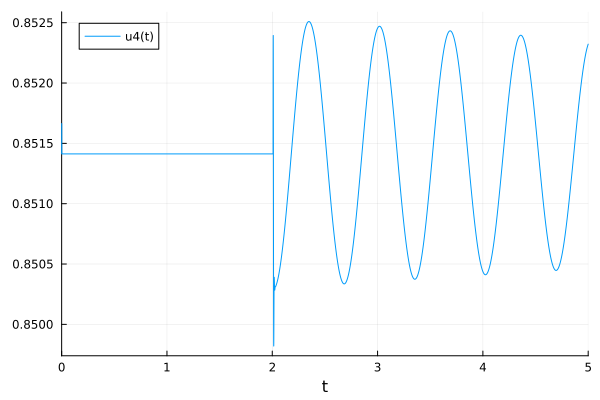

In [29]:
plot(sol,idxs=4)

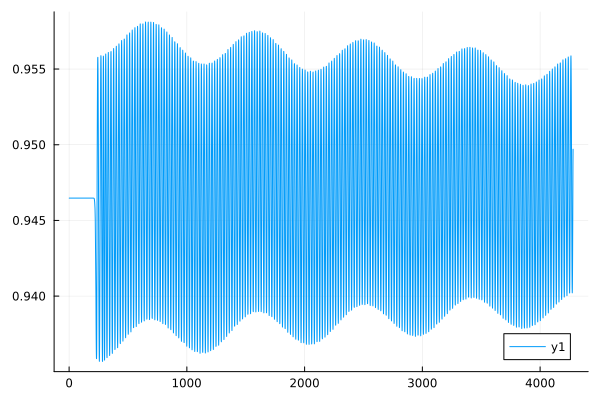

In [38]:
plot(abs.(sol[11,:] + im*sol[12,:]))